In [128]:
from __future__ import print_function, division
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [93]:
path = '/Users/aleksandra/Desktop/output_data/Data/data_daily_weather.csv'

In [91]:
def read_data(path):
    '''opens all txt files in the given directory and creates a df'''
    all_data = pd.DataFrame()
    for filename in os.listdir(path):
        with open(path+str(filename)) as f:
            df = pd.read_csv(f)
            all_data = all_data.append(df)
    all_data.columns = ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME','DESC', 'ENTRIES', 'EXITS']
    return all_data


I am going to make a plot of ridership vs. weekdays, for the busiest stations.
* read in data
* convert 'DATE' column to datetime format
* extract week of day for 'DATE'
* Select only those rows with the busiest stations
* Make one plot per station

In [94]:
with open(path) as f:
    weather = pd.read_csv(f)

In [95]:
weather['DATE'] = pd.to_datetime(weather['DATE'])

In [96]:
weather['DAY_OF_WEEK'] = weather['DATE'].dt.weekday_name

In [97]:
weather.head()

,Unnamed: 0,C/A,UNIT,SCP,STATION,UN_STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,EXITS,PREV_EXITS,SALDO_ENTRIES,SALDO_EXITS,TRANSITING,PRCP,DAY_OF_WEEK
0,0,A002,R051,02-00-00,59 ST,59ST456NQR,2016-06-27,5714706,06/26/2016,5714130.0,1938907,1938649.0,576.0,258.0,834.0,0.45,Monday
1,1,A002,R051,02-00-01,59 ST,59ST456NQR,2016-06-27,5258231,06/26/2016,5257426.0,1153431,1153236.0,805.0,195.0,1000.0,0.45,Monday
2,2,A002,R051,02-03-00,59 ST,59ST456NQR,2016-06-27,724086,06/26/2016,723741.0,2733057,2731725.0,345.0,1332.0,1677.0,0.45,Monday
3,3,A002,R051,02-03-01,59 ST,59ST456NQR,2016-06-27,5247019,06/26/2016,5246055.0,8295526,8294063.0,964.0,1463.0,2427.0,0.45,Monday
4,4,A002,R051,02-03-02,59 ST,59ST456NQR,2016-06-27,4955367,06/26/2016,4954510.0,6859058,6857968.0,857.0,1090.0,1947.0,0.45,Monday


In [99]:
transit_station = weather.groupby('UN_STATION', as_index=False).sum()
df_busiest_stations = transit_station.sort('TRANSITING', ascending=False).head(20)

//anaconda/envs/py3/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [101]:
busiest_stations = df_busiest_stations.UN_STATION

Based on busiest stations, select all of the rows from df weather for these stations.

In [166]:
busy_df = pd.DataFrame()

for station in busiest_stations:
    busy_df = busy_df.append(weather.loc[weather['UN_STATION'] == station])

In [167]:
ordered_day_of_week = busy_df.groupby(['UN_STATION', 'DAY_OF_WEEK'], as_index=False).sum()

In [170]:
ordered_day_of_week.head()

,UN_STATION,DAY_OF_WEEK,Unnamed: 0,ENTRIES,PREV_ENTRIES,EXITS,PREV_EXITS,SALDO_ENTRIES,SALDO_EXITS,TRANSITING,PRCP
0,14ST123FLM,Friday,83443696,4294170609,4.293628e+09,1889521381,1.889078e+09,542644.0,443371.0,986015.0,81.92
1,14ST123FLM,Monday,76271194,4292107266,4.291819e+09,1887842653,1.887609e+09,288587.0,234105.0,522692.0,95.04
2,14ST123FLM,Saturday,72882946,3962856339,3.962387e+09,1743363412,1.742971e+09,469376.0,392213.0,861589.0,52.80
3,14ST123FLM,Sunday,74537848,3963145929,3.962856e+09,1743614966,1.743363e+09,289590.0,251554.0,541144.0,46.40
4,14ST123FLM,Thursday,81652378,4293627965,4.293084e+09,1889078010,1.888640e+09,544333.0,438505.0,982838.0,43.20


In [174]:
per_station_plot = ordered_day_of_week[['UN_STATION', 'DAY_OF_WEEK', 'TRANSITING']]
print(type(per_station_plot))
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mapping = {day: i for i, day in enumerate(weekdays)}
per_station_plot['WD_NUM'] = per_station_plot['DAY_OF_WEEK'].map(mapping)

<class 'pandas.core.frame.DataFrame'>


//anaconda/envs/py3/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [199]:
grouped = per_station_plot.groupby('UN_STATION', as_index=False)
type(grouped)

pandas.core.groupby.DataFrameGroupBy

In [186]:
titles = list(grouped.groups)
titles


['14ST123FLM',
 '14STUNIONSQ456LNQR',
 '34STHERALDSQBDFMNQR',
 '34STPENNSTA123ACE',
 '34STPENNSTAACE',
 '42STBRYANTPK7BDFM',
 '42STPORTAUTH1237ACENQRS',
 '4750STSROCKBDFM',
 '59ST456NQR',
 '59STCOLUMBUS1ABCD',
 '86ST456',
 '96ST123',
 'ATLAVBARCLAY2345BDNQR',
 'CANALST6JNQRZ',
 'FLUSHINGMAIN7',
 'FULTONST2345ACJZ',
 'GRDCNTRL42ST4567S',
 'JKSNHTROOSVLT7EFMR',
 'LEXINGTONAV536EM',
 'TIMESSQ42ST1237ACENQRS']

14ST123FLM
14STUNIONSQ456LNQR
34STHERALDSQBDFMNQR
34STPENNSTA123ACE
34STPENNSTAACE
42STBRYANTPK7BDFM
42STPORTAUTH1237ACENQRS
4750STSROCKBDFM
59ST456NQR
59STCOLUMBUS1ABCD
86ST456
96ST123
ATLAVBARCLAY2345BDNQR
CANALST6JNQRZ
FLUSHINGMAIN7
FULTONST2345ACJZ
GRDCNTRL42ST4567S
JKSNHTROOSVLT7EFMR
LEXINGTONAV536EM
TIMESSQ42ST1237ACENQRS


//anaconda/envs/py3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


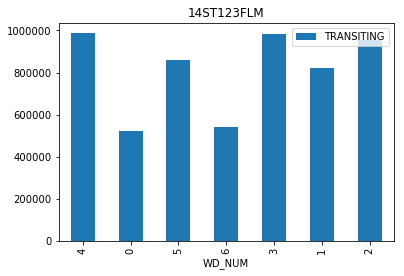

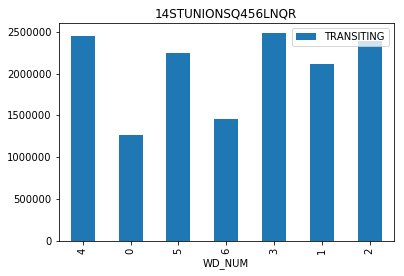

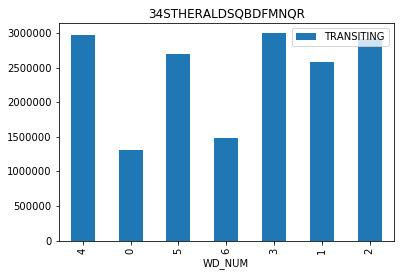

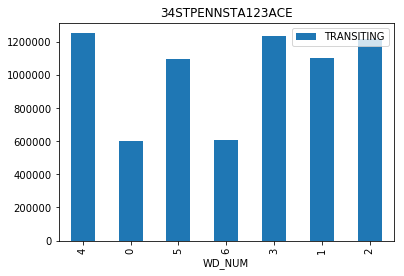

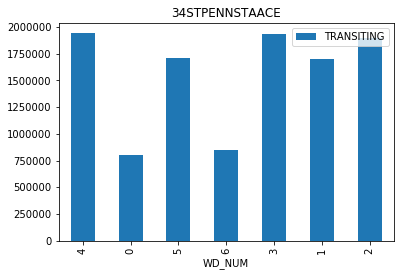

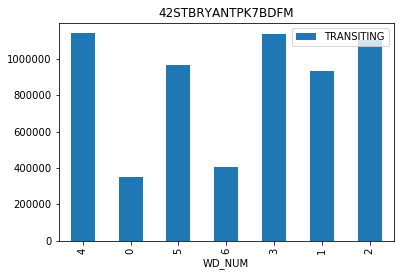

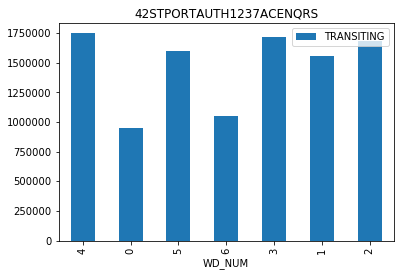

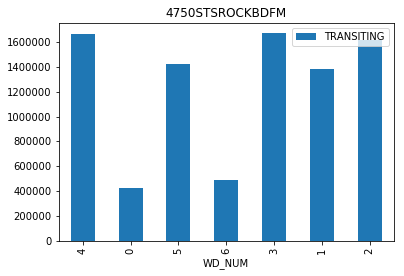

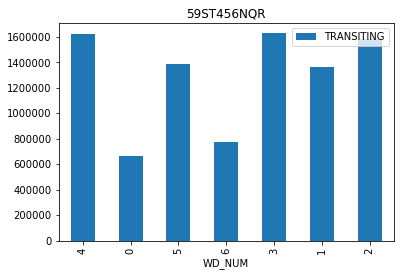

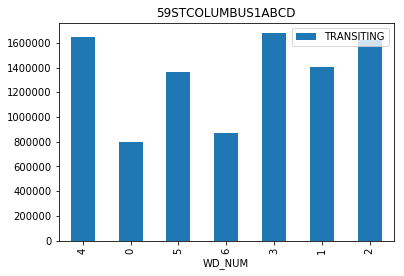

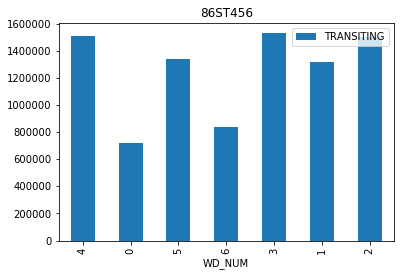

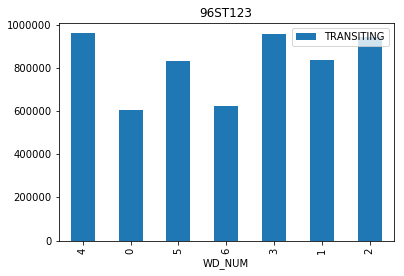

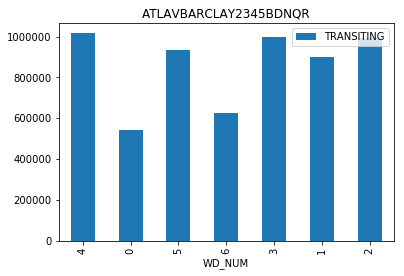

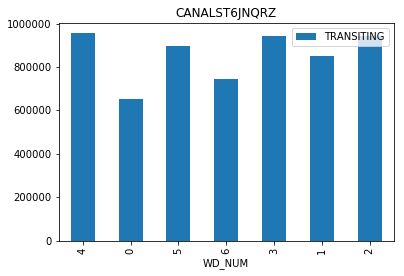

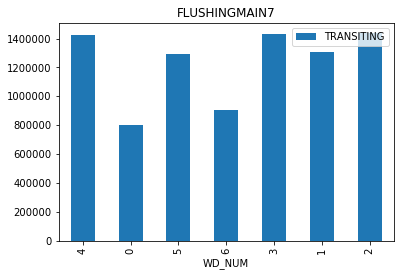

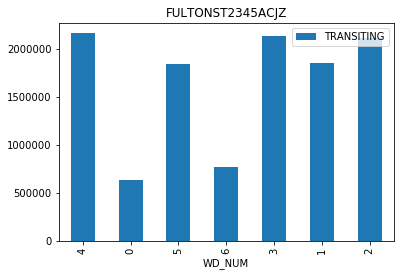

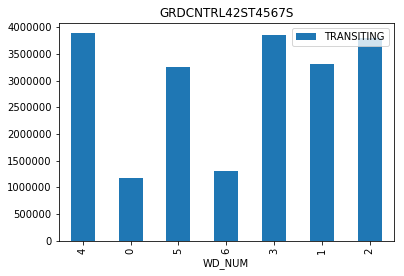

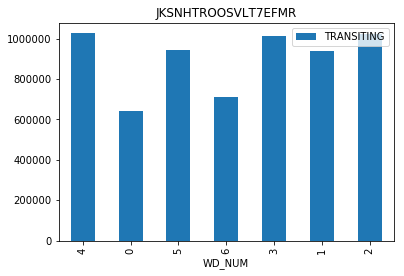

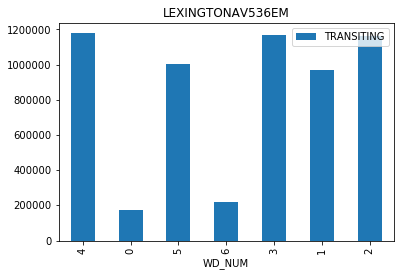

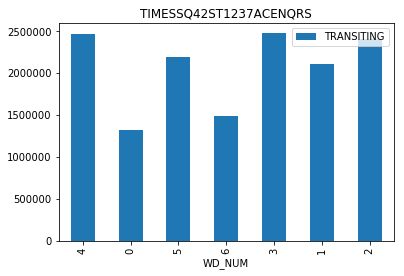

In [222]:
plt.figure()
for i,group in grouped:
    group.plot(x='WD_NUM', y='TRANSITING', title=i, kind='bar', sort_columns=False, layout= (4, 7))


In [215]:
per_day = per_station_plot.groupby('DAY_OF_WEEK', as_index=False).sum()

In [216]:
per_day.head()

,DAY_OF_WEEK,TRANSITING,WD_NUM
0,Friday,34008691.0,80
1,Monday,14925948.0,0
2,Saturday,29883198.0,100
3,Sunday,16759165.0,120
4,Thursday,33975271.0,60


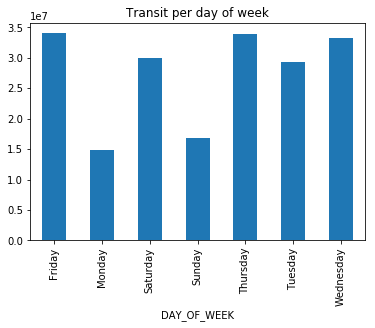

In [221]:
per_day.plot(x = 'DAY_OF_WEEK', y = 'TRANSITING' , kind='bar', legend=False, title = 'Transit per day of week')
plt.savefig('Data/plot_transit_dow.pdf')